### ASTR 8070: Astrostatistics
***S. R. Taylor***
___

# Homework 2
### Due: Saturday, Jan 27th at 11.59pm CST
---

## Problem 1

This question is about Monte Carlo integration. A standard Gaussian integral takes the form 

$$ \int_0^\infty x^3 \exp\left(-\frac{x^2}{2\sigma^2}\right) \,dx = 2\sigma^4 .$$

1) Write down the usual form of a Gaussian distribution with $\mu=0$ and $\sigma=\sigma$ that is normalized between $\infty$ and $+\infty$. What is the corresponding form of a half-Gaussian distribution between $0$ and $+\infty$? (Remember that the half-Gaussian distribution must be normalized such that it integrates to one.)

2) Manipulate the above equation such that you can write the left hand side in terms of a normalized half-Gaussian distribution. 

3) Draw $N=10^5$ samples from a $\sigma=3$ normal distribution, mask the samples such that only positive values are accepted, then perform Monte Carlo integration using your equation in (2). Confirm that this *approximately* matches the value computed from the right hand side of the equation. If you don't get approximately matching values then you may have forgotten normalization factors for the Gaussian, or constant factors from translating a normalized Gaussian to a half-Gaussian.

4) Repeat (3) for $N=[10^2,10^3,10^4]$, computing the integral using $100$ different batches of random samples for each $N$. Record all calculated values at all $N$. 

5) Make a plot that shows $\log_{10}N$ along the $x$-axis and the spread between the maximum and minimum Monte Carlo integral values that you get at each $N$ on the $y$-axis. (Note: matplotlib's `fill_between` command is useful for this). Plot a horizontal line on the same figure to show the precise mathematical value. You should see that Monte Carlo integration results in less numerical spread as $N$ gets larger.

### Solution

Part 1

The standard Gaussian distribution with $\mu=0$ and $\sigma=\sigma$ is given by:

$$
f(x) = \frac{1}{\sigma\sqrt{2\pi}} \exp\left(-\frac{x^2}{2\sigma^2}\right)
$$

The corresponding form of a half-Gaussian distribution with support in the range [0, +∞) is given by:

$$
f(x) = \frac{1}{\sigma\sqrt{2\pi}} \exp\left(-\frac{x^2}{2\sigma^2}\right) \cdot \mathbb{1}_{[0, \infty)}(x)
$$

where $\mathbb{1}_{[0, \infty)}(x)$ is the indicator function, equal to 1 if $x$ is in the interval [0, ∞), and 0 otherwise.

To normalize the half-Gaussian distribution, ensuring the area under the curve is equal to 1, we calculate the integral:

$$
\int_0^\infty \frac{1}{\sigma\sqrt{2\pi}} \exp\left(-\frac{x^2}{2\sigma^2}\right) \cdot \mathbb{1}_{[0, \infty)}(x) \,dx = 1
$$

By the properties of the indicator function, this simplifies to:

$$
\int_0^\infty \frac{1}{\sigma\sqrt{2\pi}} \exp\left(-\frac{x^2}{2\sigma^2}\right) \,dx = \frac{1}{2}
$$

To normalize the half-Gaussian distribution, it is multiplied by a factor of 2:

$$
f(x) = \frac{2}{\sigma\sqrt{2\pi}} \exp\left(-\frac{x^2}{2\sigma^2}\right) \cdot \mathbb{1}_{[0, \infty)}(x)
$$

This normalized half-Gaussian distribution integrates to 1 between 0 and +∞, obtained by truncating the standard Gaussian distribution at 0.

Also the $$\cdot \mathbb{1}_{[0, \infty)}(x)$$ is the indicator function, sometimes denoted as 1 or I, with a subscript indicating the interval on which it is defined. In this case, $\mathbb{[0, \infty)}$ signifies that the function is equal to 1 if x belongs to the interval $\mathbb{[0, \infty)}$, and it is equal to 0 otherwise.


<span style="color:red">I like the formal argument. All good here. You could have skipped some math through intuitive arguments, but I really like the layout of your solution.</span>



Part 2

To write the left hand side of the Gaussian integral in terms of a normalized-Gaussian distribution we can make the following substitution:
$$
u = \frac{x}{\sigma\sqrt{2}}
$$
Then,
$$
du = \frac{1}{\sigma\sqrt{2}} dx
$$
and
$$
x = u\sigma\sqrt{2}
$$
Substituting these expressions into the left hand side of the Gaussian integral, we get:

$$
\int_0^\infty x^3 \exp\left(-\frac{x^2}{2\sigma^2}\right) \,dx = \int_0^\infty (u\sigma\sqrt{2})^3 \exp(-u^2) \cdot \frac{1}{\sigma\sqrt{2}} \,du = 2\sigma^4 \int_0^\infty u^3 \exp(-u^2) \,du
$$

Now, we have the integral on the right hand side as the integral of a normalized half-Gaussian distribution with $\mu=0$ and $\sigma=1$ between 0 and +∞:
$$
\int_0^\infty u^3 \exp(-u^2) \,du = \int_0^\infty \frac{1}{\sqrt{2\pi}} u^3 \exp\left(-\frac{u^2}{2}\right) \cdot \mathbb{1}_{[0, \infty)}(u) \,du
$$
Therefore, we can write the left hand side of the Gaussian integral as:
$$
\int_0^\infty x^3 \exp\left(-\frac{x^2}{2\sigma^2}\right) \,dx = 2\sigma^4 \int_0^\infty \frac{1}{\sqrt{2\pi}} u^3 \exp\left(-\frac{u^2}{2}\right) \cdot \mathbb{1}_{[0, \infty)}(u) \,du
$$

This expression is shown in terms of a normalized half-Gaussian distribution.

Also for more clarification(mainly for me). The normalization constant $\frac{1}{\sqrt{2\pi}}$ is included in the definition of the half-Gaussian distribution, since it is a probability density function. The indicator function $\mathbb{1}_{[0, \infty)}(u)$ is included to ensure that the integral is taken over the correct interval.


Part 3

In [87]:
from scipy.stats import norm, uniform
# sigma = 3
# Number of samples
N = 10**5

# Generate samples from a half-normal distribution also im not sure if we need to mask the samples before or after
sample= norm(loc=0, scale=3)
samples = sample.rvs(size=N)
samples = samples[samples > 0]

def Monte(x):
    # For the gaussian pdf to half gaussian over the positive interval
    return np.sqrt(np.pi * 3**2 / 2) * x**3 * sample.pdf(x)

# Compute Monte Carlo integration using the equation in (2)
mc_integral = np.sum(Monte(samples) / (sample.pdf(samples)))/len(samples)

# Compute the right hand side of the equation
analytical_integral = 2 * 3**4

# Print the results
print("Monte Carlo integral:", mc_integral)
print("Analytical integral:", analytical_integral)


Monte Carlo integral: 162.33893759623658
Analytical integral: 162


<span style="color:red">I was almost going to mark this down as incorrect, because I wondered why you evaluated the Gaussian pdf in your `Monte` function. The idea of Monte Carlo integration is that by drawing samples, you avergae over the target function eraluated at those samples. But then I saw that you reversed this operation by dividing through by that pdf. So you didn't need to do that at all.</span>

part 4

In [126]:
import numpy as np
from scipy.stats import norm

# Sigma value
#sigma = 3
# Number of batches
num_batches = 100

# Number of samples for each batch
Ns = [10**2, 10**3, 10**4]


def Monte(x):
    # For the gaussian pdf to half gaussian over the positive interval
    return np.sqrt(np.pi * 3**2 / 2) * x**3 * sample.pdf(x)


# Initialize list to store Monte Carlo estimates
mc_estimates = []

# Generate Monte Carlo estimates for each N
for N in Ns:
    mc_estimate = 0
    for i in range(num_batches):
        sample = norm(loc=0, scale=3)
        samples = sample.rvs(size=N)
        samples = samples[samples > 0]
        mc_estimate += np.sum(Monte(samples) / (sample.pdf(samples)))/len(samples)
    mc_estimate /= num_batches
    mc_estimates.append(mc_estimate)

# Compute the right hand side of the equation
analytical_integral = 2 * 3**4

# Print the results
for i, N in enumerate(Ns):
    print(f"Monte Carlo integral for N = {N}: {mc_estimates[i]}")
print(f"Analytical integral: {analytical_integral}")

Monte Carlo integral for N = 100: 166.90042450498584
Monte Carlo integral for N = 1000: 162.47606040485826
Monte Carlo integral for N = 10000: 161.79923371070427
Analytical integral: 162


part 5

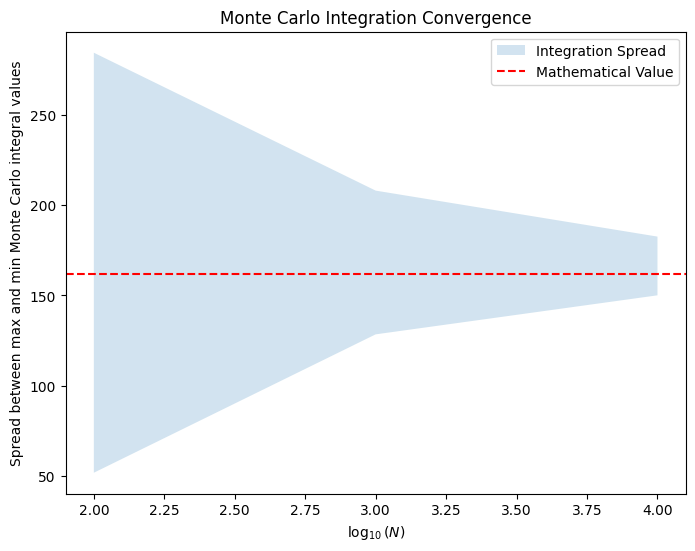

In [141]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

# Sigma value
# sigma = 3
# Number of batches
num_batches = 100

# Number of samples for each batch
Ns = [10**2, 10**3, 10**4]

def Monte(x):
    # For the Gaussian pdf to half Gaussian over the positive interval
    return np.sqrt(np.pi * 3**2 / 2) * x**3 * sample.pdf(x)

# Initialize lists to store Monte Carlo estimates, max spread, and min spread
mc_estimates = []
max_spread_values = []
min_spread_values = []

# Generate Monte Carlo estimates for each N
for N in Ns:
    max_spread_list = []
    min_spread_list = []
    estimates = []
    
    for i in range(num_batches):
        sample = norm(loc=0, scale=3)
        samples = sample.rvs(size=N)
        samples = samples[samples > 0]
        
        estimate = np.sum(Monte(samples) / (sample.pdf(samples))) / len(samples)
        estimates.append(estimate)
        
        max_spread = np.max(estimates)
        min_spread = np.min(estimates)
        max_spread_list.append(max_spread)
        min_spread_list.append(min_spread)

    # Calculate average estimate for N
    mc_estimate = np.mean(estimates)
    mc_estimates.append(mc_estimate)
    
    # Take the final max and min spread values
    max_spread_values.append(np.max(max_spread_list))
    min_spread_values.append(np.min(min_spread_list))

# Compute the right-hand side of the equation
analytical_integral = 2 * 3**4

# Plotting
plt.figure(figsize=(8, 6))

# Plotting the area between the max and min spread values using fill_between
plt.fill_between(np.log10(Ns), max_spread_values, min_spread_values, alpha=0.2, label='Integration Spread')


# Plotting the horizontal line for the mathematical value
plt.axhline(y=analytical_integral, color='r', linestyle='--', label='Mathematical Value')

# Adding labels and title
plt.xlabel('$\log_{10}(N)$')
plt.ylabel('Spread between max and min Monte Carlo integral values')
plt.title('Monte Carlo Integration Convergence')
plt.legend()

# Show the plot
plt.show()

<span style="color:red">Excellent.</span>

## Problem 2

This question is about IQ. It's a flawed and questionable metric, but useful for this problem. By definition, IQ is calibrated as a Gaussian distribution with $\mu=100$ and $\sigma=15$. 

1) Create a `scipy.stats` Gaussian object with these properties. Plot the distribution, and print out 10 random draws, along with the pdf at $x=145$. 

2) Access the `cdf` property of the Gaussian object and plot it over the same $x$-range as in (1) but in a different figure. Access the `ppf` property (percent point function) and use *inverse transform sampling* of the cdf to draw $10^4$ random samples, and make a histogram of these. Overplot the pdf from (1). These should match.

3) What fraction of people have IQ > 145? *Hint: investigate all the properties of the Gaussian object from (1) to find the relevant property that gives you this, or perform a calculation involving the cdf.*

4) What IQ corresponds to "one in a million"?

### Solution

Part 1

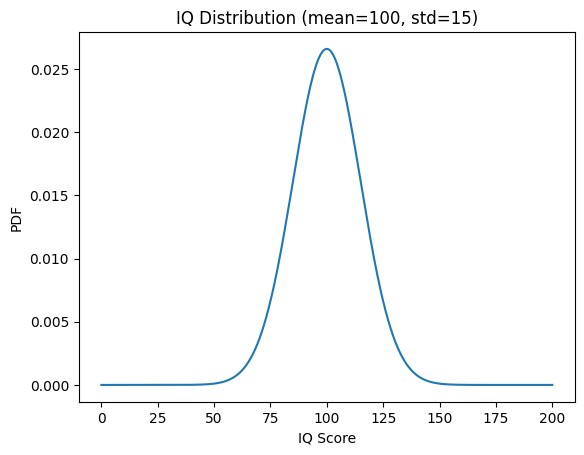

10 random draws:
[ 69.4441857  102.46094238 116.36226273  97.99515313  84.50874607
  81.21347045 102.56969717 107.3837578   80.54555377  98.92840225]

pdf at x=145:
0.0002954565607958672


In [2]:
# import section
import numpy as np
import scipy 
from scipy.stats import norm
import matplotlib.pyplot as plt


# Create the Gaussian object
iq_dist = norm(loc=100, scale=15)

# Plot the distribution
x = np.linspace(0, 200, 1000)
plt.plot(x, iq_dist.pdf(x))
plt.title('IQ Distribution (mean=100, std=15)')
plt.xlabel('IQ Score')
plt.ylabel('PDF')
plt.show()

# Print 10 random draws and the pdf at x=145
print("10 random draws:")
print(iq_dist.rvs(size=10))

print("\npdf at x=145:")
print(iq_dist.pdf(145))

Part 2

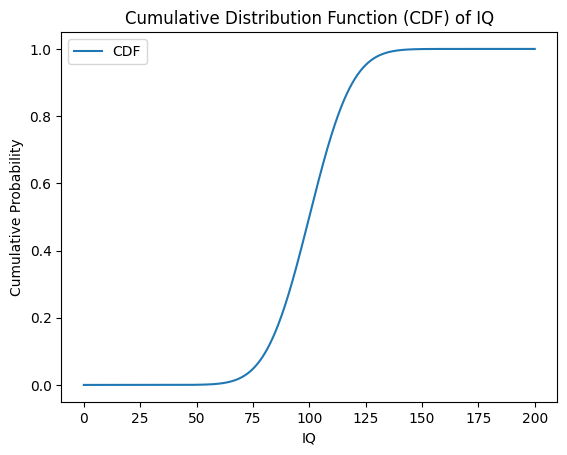

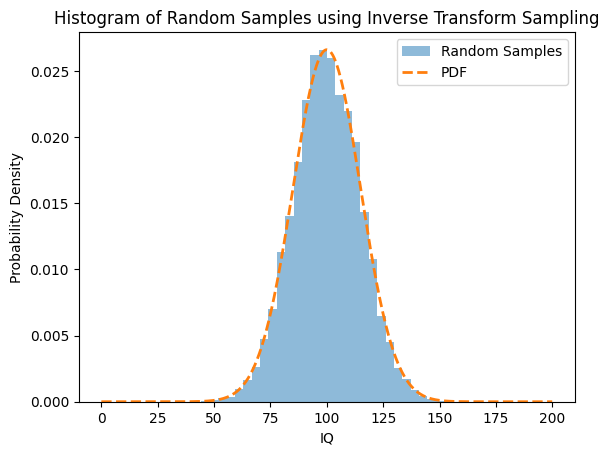

In [8]:
plt.plot(x, iq_dist.cdf(x), label='CDF')
plt.title('Cumulative Distribution Function (CDF) of IQ')
plt.xlabel('IQ')
plt.ylabel('Cumulative Probability')
plt.legend()
plt.show()

# Use inverse transform sampling to draw 10^4 random samples
random_samples = iq_dist.ppf(np.random.rand(10**4))

# Make a histogram of the random samples
plt.hist(random_samples, bins=30, density=True, alpha=0.5, label='Random Samples')
plt.plot(x, iq_dist.pdf(x), label='PDF', linestyle='--', linewidth=2)
plt.title('Histogram of Random Samples using Inverse Transform Sampling')
plt.xlabel('IQ')
plt.ylabel('Probability Density')
plt.legend()
plt.show()

Part 3

In [9]:
# Calculate the probability of an IQ <= 145
p_leq_145 = iq_dist.cdf(145)

# Calculate the probability of having an IQ > 145
p_gt_145 = 1 - p_leq_145

print(f"The fraction of people with IQ > 145 is {p_gt_145:.4f}.")

The fraction of people with IQ > 145 is 0.0013.


Part 4

In [18]:
# Calculate the IQ value that corresponds to a probability of 1/1,000,000, looking at the upper quantile
iq_one_in_million = iq_dist.ppf(1 - (1/1000000))

print(f"The IQ that corresponds to 'one in a million' is {iq_one_in_million:.2f}.")

The IQ that corresponds to 'one in a million' is 171.30.


<span style="color:red">Excellent.</span>

## Problem 3

This question is about Poisson distributions. A famous early application was an analysis of Prussian cavalryman horse-kick deaths by [Bortkiewicz](https://www.wikiwand.com/en/Ladislaus_Bortkiewicz) in 1898. Let's take a short look at the kind of data he analyzed.

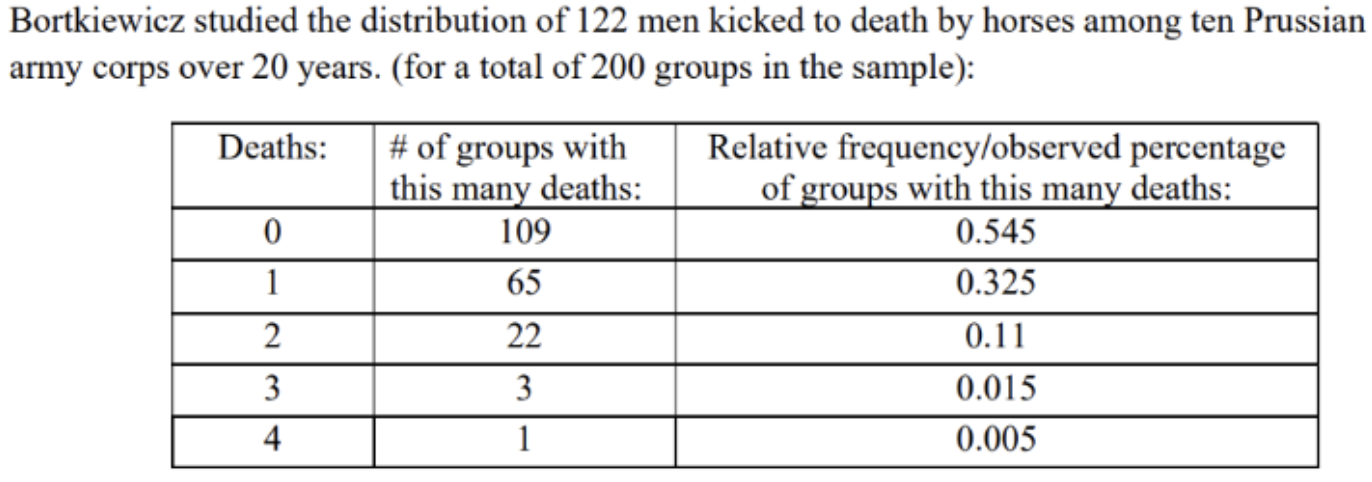

The data essentially consist of 200 total years of Prussian army corps information (i.e. ten army corps over 20 years).

1) Make a plot of the first and third columns of this data.

2) Plot a few Poisson distributions on top that are characterized by different $\mu$ values that might be reasonable guesses for how the data is distributed.

3) We'll come to model fitting next week, but for now use the descriptive sample statistics that you can calculate from this data to deduce the $\mu$ of the modeled Poisson distribution, e.g. the mean, std, median, mode, skewness, and kurtosis, where relevant. Do this however you like, but note that with the data in the table you won't just be able to get a sample mean, since these are tabulated densities, not samples. 

*Hint: use a weighted mean, or alternatively make a dataset that has the numbers 0,1,2,3,4 in agreement with their frequency in the table.*

4) Plot the Poisson distribution with the $\mu$ found in (3) alongside the data.

### Solution

Part 1

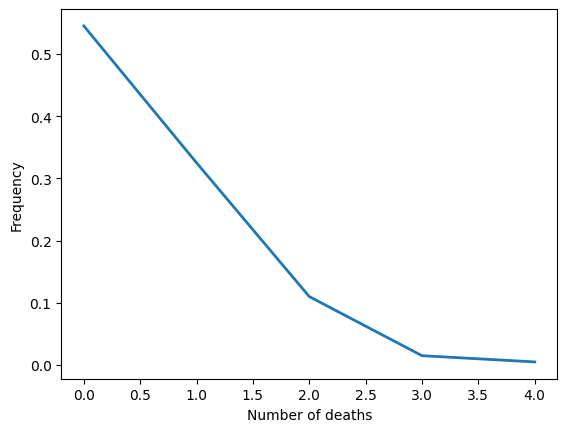

In [31]:
import matplotlib.pyplot as plt

# Plug the data
Death_Col = [0,1,2,3,4] 
Feq_Col = [0.545, 0.325, 0.11, 0.015, 0.005]

# Plot the graph

plt.plot(Death_Col, Feq_Col, label="data", linewidth=2)
plt.xlabel('Number of deaths')
plt.ylabel('Frequency')
plt.show()

Part 2

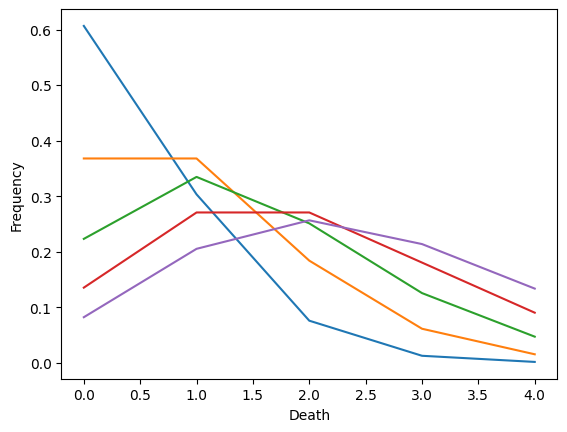

In [38]:
import numpy as np
from scipy.stats import poisson

# Create a few Poisson distributions with different mu values
mu_values = [0.5, 1, 1.5, 2, 2.5]
poisson_dists = [poisson(mu) for mu in mu_values]

# Plot the PMF of the Poisson distributions
x = np.arange(0, 5)
for dist in poisson_dists:
    plt.plot(Death_Col, dist.pmf(x))
    plt.xlabel("Death")
    plt.ylabel("Frequency")


part 3

In [44]:
import numpy as np

# Deducing the mu of the model
mean = np.average(Death_Col, weights=Feq_Col)
pmf = poisson.pmf(Death_Col,mean)

print(f"Estimated mu: {mean:.2f}")
print(f"PMF: {pmf}")


Estimated mu: 0.61
PMF: [0.54335087 0.33144403 0.10109043 0.02055505 0.00313465]


Part 4

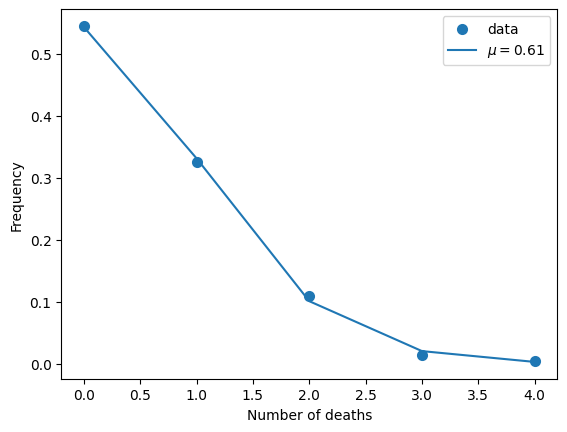

In [47]:
import matplotlib.pyplot as plt

# Plot the data
plt.scatter(Death_Col, Feq_Col, label="data", linewidth=2)

# Plot the Poisson distribution with the estimated mu
x = np.arange(0, 5)
pmf = poisson.pmf(x, mean)
plt.plot(x, pmf, label=f"$\mu = {mean:.2f}$")

plt.xlabel('Number of deaths')
plt.ylabel('Frequency')
plt.legend()
plt.show()

<span style="color:red">Excellent again.</span>